<a href="https://colab.research.google.com/github/kazuki-komori/coursera/blob/main/regression/CSR_regression_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第3回 勉強会

## 重回帰のための勾配降下法の実装
Implementing gradient descent for multiple regression

https://www.coursera.org/learn/ml-regression/supplement/tcfe4/implementing-gradient-descent-for-multiple-regression

### TODO
- 切片を考慮し、SFrame（またはそれ以外）に1の定数列を追加する

  > Add a constant column of 1's to a SFrame (or otherwise) to account for the intercept

- SFrameをnumpyの配列に変換する

  > Convert an SFrame into a numpy array

- numpy を使って predict_output() 関数を書く

  > Write a predict_output() function using numpy

- 単一の特徴量に関する回帰重みの導関数を計算するnumpy関数を記述する

  > Write a numpy function to compute the derivative of the regression weights with respect to a single feature

- 初期重みベクトル、ステップサイズ、許容誤差を与えて、回帰重みを計算する勾配降下関数を書く

  > Write gradient descent function to compute the regression weights given an initial weight vector, step size and tolerance.

- 複数の特徴量の回帰重みを推定するために勾配降下関数を使用する
  
  > Use the gradient descent function to estimate regression weights for multiple features


## setup

In [ ]:
!unzip -q /content/drive/MyDrive/coursera/home_data.zip

replace home_data.sframe/m_1ce96d9d245ca490.0000? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 1.2 MB/s 
     |████████████████████████████████| 86.4 MB 70 kB/s 
     |████████████████████████████████| 322 kB 55.0 MB/s 
     |████████████████████████████████| 3.5 MB 56.7 MB/s 
     |████████████████████████████████| 3.6 MB 37.8 MB/s 
     |████████████████████████████████| 18.3 MB 379 kB/s 
     |████████████████████████████████| 20.1 MB 509 kB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 3.8 MB 49.8 MB/s 
     |████████████████████████████████| 2.9 MB 52.0 MB/s 
     |████████████████████████████████| 449 kB 47.9 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=c2640d0d9723b08b25607d5f0e4d8e5193bb54fe8e5ceb5272e0fe65bd863fcf
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=df27988f74

In [ ]:
import turicreate
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## (1) データの読み込み

In [ ]:
df_house = turicreate.SFrame('/content/home_data.sframe')
df_house.head(5)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.51123398
0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.72102274
0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.73792661
0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.52082


## (2) numpy の import

In [ ]:
import numpy as np

## (3) SFrame から numpry に変換する

In [ ]:
def get_numpy_data(df, features, target):
  df['constant'] = 1
  features_matrix = df[["constant", *features]].to_numpy()
  output_array = df[target].to_numpy()
  return features_matrix, output_array

In [ ]:
hoge = ["A", "B", "C"] + ["D"]
print(hoge)

['A', 'B', 'C', 'D']


## (4) 1次元重みを付与し, 予測値を算出

In [ ]:
def predict_outcome(feature_matrix, weights):
  predictions = np.dot(feature_matrix, weights)
  return predictions

## (5) 誤差配列を受け取ってをコスト関数の微分を算出してみる

微分の参考
https://qiita.com/Takayoshi_Makabe/items/faa735ae0db9655b2ea9

$\frac{\partial Cost}{\partial w} = RSS(w) = 0$

$\frac{\partial Cost}{\partial w} = (H^TH)^{-1}Hy^T$

In [ ]:
def feature_derivative(feature, errors):
    derivative = 2 * np.dot(feature, errors)
    return derivative

## (6) 勾配法の実装を行う

以下の式で勾配を更新することができる

$\mathbf{w^{t+1}} = \mathbf{w^{t}} - \eta\nabla RSS(\mathbf{w^{t}})$

$\nabla RSS(\mathbf{w^{t}}) = -2H^{T}(y-Hw)$

$\mathbf{w^{t+1}} = \mathbf{w^{t}} + 2\eta H^{T}(y-Hw)$

In [ ]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    _epoch = 0
    while not converged:
      _epoch += 1
      # compute the predictions based on feature_matrix and weights:
      _pred = predict_outcome(feature_matrix, weights)
      # compute the errors as predictions - output:
      _errors = _pred - output
      
      gradient_sum_squares = 0 # initialize the gradient
      # while not converged, update each weight individually:
      for i in range(len(weights)):
        # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
        # compute the derivative for weight[i]:
        _derivative = feature_derivative(feature_matrix[:, i], _errors)
        # add the squared derivative to the gradient magnitude
        gradient_sum_squares += _derivative ** 2
        # update the weight based on step size and derivative:
        weights[i] = weights[i] - step_size * _derivative
      gradient_magnitude = np.sqrt(gradient_sum_squares)
      if (_epoch % 1000 == 0):
        print(f"{gradient_magnitude - tolerance: .2f}")
      # if gradient_magnitude == np.inf:
      #   exit()
      if gradient_magnitude < tolerance:
          converged = True
    print(f"重みの計算結果: {weights}")
    return weights

## (7) データを分割する

In [ ]:
df_train, df_test = df_house.random_split(.8,seed=0)

## (8) `regression_gradient_descent` を実際に使って, 勾配法を動かしてみる

パラメータ

| param |  value |
| ---------- | --------------- |
| features |  sqft_living |
| output |  price |
| initial weights |  -47000, 1 (intercept, sqft_living respectively) |
| step size | 7e-12 |
| tolerance | 2.5e-7 |

In [ ]:
simple_features = ['sqft_living']
target = 'price'
simple_feature_matrix, output = get_numpy_data(df_train, simple_features, target)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [ ]:
simple_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

重みの計算結果: [-46999.88716555    281.91211912]


## (9) sqft_living の重み

In [ ]:
print(f"計算結果: {simple_weights[1] : .2f}")

計算結果:  281.91


## (10) simple_weight と test_data を用いて住宅価格の予測を行う

In [ ]:
test_simple_feature_matrix, test_output = get_numpy_data(df_test, simple_features, target)
model1_pred = predict_outcome(test_simple_feature_matrix, simple_weights)

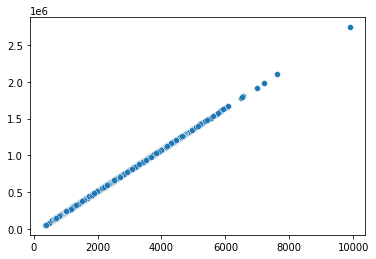

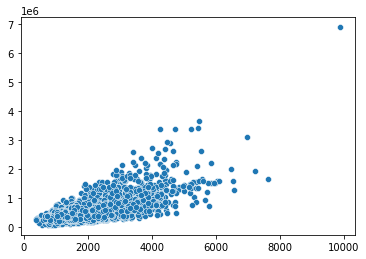

In [ ]:
sns.scatterplot(x=df_test["sqft_living"], y=model1_pred)
plt.show()
sns.scatterplot(x=df_test["sqft_living"], y=df_test["price"])
plt.show()

## (11) 1件目の予測価格

In [ ]:
print(f"1件目の予測価格 {model1_pred[0]: .2f}")

1件目の予測価格  356134.44


## (12) RSS の算出

RSS デカすぎて草

In [ ]:
def calc_rss(current, pred):
  rss = ((current - pred) ** 2).sum()
  print(f"RSS: {rss: .2f}\n")
  return rss

In [ ]:
model1_rss = calc_rss(df_test["price"].to_numpy(), model1_pred)

RSS:  275400047593155.94



## (13) パラメータ変えて実験してみよう！

近隣15軒の住宅平均坪数を変数として追加する

パラメータ

| param |  value |
| ---------- | --------------- |
| features |  sqft_living, sqft_living_15 |
| output |  price |
| initial weights |   [-100000, 1, 1] (intercept, sqft_living, and sqft_living_15 respectively) |
| step size | 4e-12 |
| tolerance | 1e9 |

In [ ]:
model2_features = ['sqft_living', 'sqft_living15']
target = 'price'
feature_matrix, output = get_numpy_data(df_train, model2_features, target)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [ ]:
model2_weights = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

重みの計算結果: [-9.99999688e+04  2.45072603e+02  6.52795277e+01]


## (14) test_data を用いて予測

In [ ]:
test_simple_feature_matrix, test_output = get_numpy_data(df_test, model2_features, target)
model2_pred = predict_outcome(test_simple_feature_matrix, model2_weights)

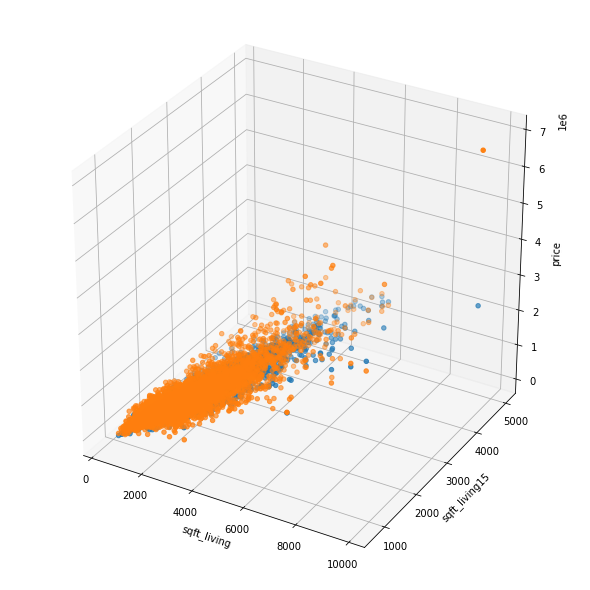

In [ ]:
fig=plt.figure(figsize=(8, 8))
ax=Axes3D(fig)

ax.scatter3D(df_test["sqft_living"], df_test["sqft_living15"], model2_pred)
ax.scatter3D(df_test["sqft_living"], df_test["sqft_living15"], df_test["price"])
ax.set_xlabel("sqft_living")
ax.set_ylabel("sqft_living15")
ax.set_zlabel("price")

plt.show()

In [ ]:
def plt_3d(x1, x2, y, current, weights):
  fig=plt.figure(figsize=(8, 8))
  ax=Axes3D(fig)

  ax.scatter3D(x1, x2, y)
  ax.scatter3D(x1, x2, current)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_zlabel("y")

  mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/20)
  mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/20)
  mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
  mesh_y = weights[0] * mesh_x1 + weights[1] * mesh_x2 + weights[2]
  ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
  plt.show()

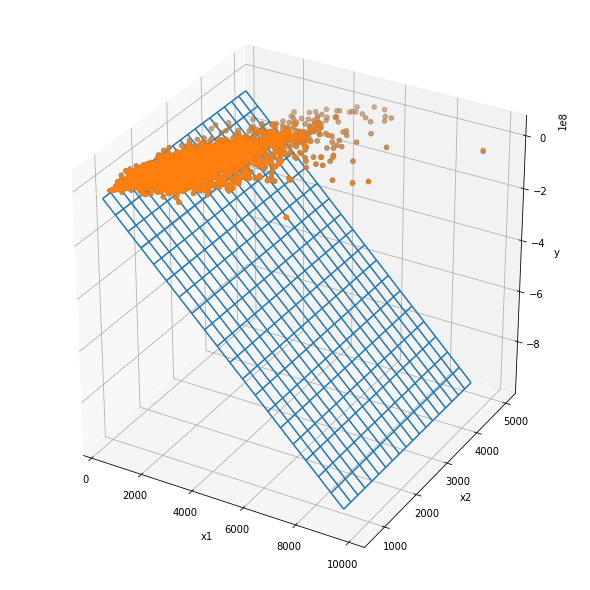

In [ ]:
plt_3d(df_test["sqft_living"], df_test["sqft_living15"], model2_pred, df_test["price"], model2_weights)

## (15) 1軒目の予測価格

In [ ]:
print(f"予測1軒目: {model2_pred[0]: .1f}")

予測1軒目:  366651.4


## (16) テストデータの1軒目

In [ ]:
print(f"テストデータ1軒目: {df_test['price'][0]}")

テストデータ1軒目: 310000.0


In [ ]:
df_test["price"].max()

6885000.0

## (17) 1軒目に関してmodel1 と model2 の比較

model1の方が誤差が小さい

In [ ]:
_actual = df_test["price"][0]
print(f"model1: {model1_pred[0] - _actual: .2f}\n")
print(f"model2: {model2_pred[0] - _actual: .2f}\n")
abs(model1_pred[0] - _actual) < abs(model2_pred[0] - _actual)

model1:  46134.44

model2:  56651.41



True

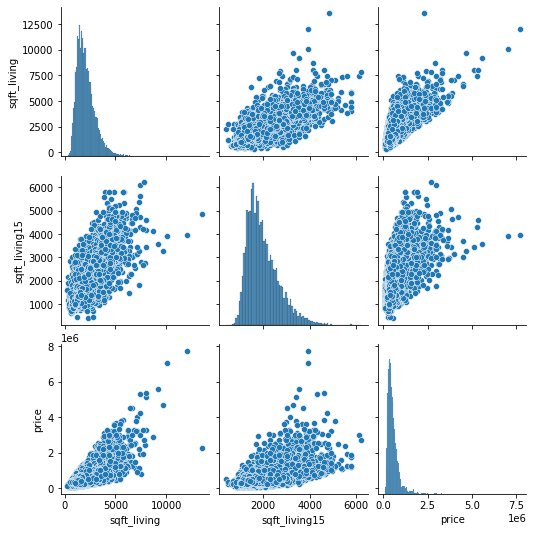

In [ ]:
sns.pairplot(df_train[["sqft_living", "sqft_living15", "price"]].to_dataframe())

## (18) model2 の RSS を計算

In [ ]:
model2_rss = calc_rss(df_test["price"].to_numpy(), model2_pred)

RSS:  270263446465244.06



## (19) model1 と model2 で RSS を比較

model2 の方が RSS が大きい

In [ ]:
print(model1_rss/len(df_test))
print(model2_rss/len(df_test))
model1_rss < model2_rss

65121789452.15321
63907175801.66566


False

In [ ]:
print(np.sqrt(model1_rss)/len(df_test))
print(np.sqrt(model2_rss)/len(df_test))

3924.13843865507
3887.3708184672714


## extra 前回に当てはまりが良かった変数を採用してみる

In [ ]:
model3_features = ["sqft_living", "bedrooms", "bathrooms", "lat", "long"]
target = 'price'
feature_matrix, output = get_numpy_data(df_train, model3_features, target)
initial_weights = np.array([-100000., 1., 1., 1., 1., 1.])
step_size = 4e-12
tolerance = 1.5e9

In [ ]:
model3_weights = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

 24509539820.82
 16099073303.26
 10427680366.13
 6612476292.90
 4059101973.20
 2368468923.81
 1272683229.64
 589264006.19
 187548132.07
重みの計算結果: [-9.99970772e+04  2.82221031e+02 -3.94157040e+01  7.80179979e-01
  1.58800149e+02 -3.66751652e+02]


In [ ]:
test_simple_feature_matrix, test_output = get_numpy_data(df_test, model3_features, target)
model3_pred = predict_outcome(test_simple_feature_matrix, model3_weights)
model3_rss = calc_rss(df_test["price"].to_numpy(), model3_pred)

RSS:  275366382062467.94



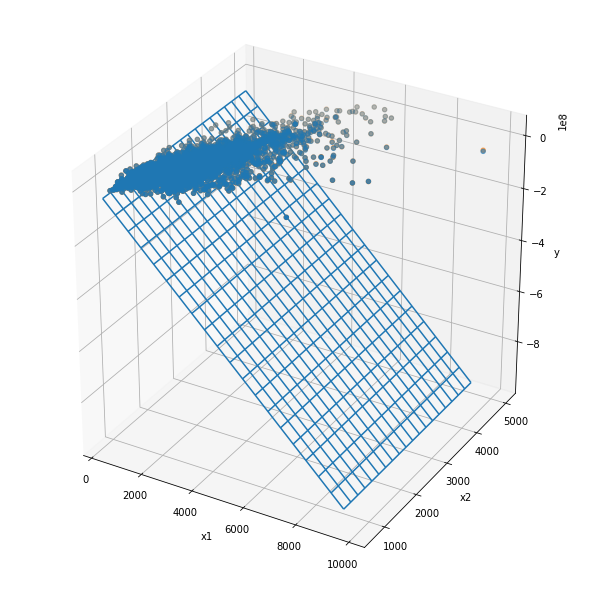

In [ ]:
plt_3d(df_test["sqft_living"], df_test["sqft_living15"], model3_pred, df_test["price"], model3_weights)